In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
df=pd.read_csv('houses_ridge.csv')
print(df.isnull().sum())
df.shape

size_m2          0
bedrooms         0
bathrooms        0
distance_city    0
age_years        0
price_k          0
dtype: int64


(150, 6)

In [4]:
df.describe()

,size_m2,bedrooms,bathrooms,distance_city,age_years,price_k
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,105.321333,2.966667,2.446667,10.750000,18.450000,128.431333
std,26.580044,0.965281,1.058913,5.260589,9.881287,41.789288
min,40.000000,1.000000,1.000000,1.000000,0.000000,31.600000
25%,87.075000,2.000000,2.000000,6.375000,12.000000,98.900000
50%,106.500000,3.000000,2.000000,11.200000,17.700000,120.950000
75%,120.850000,4.000000,3.000000,14.300000,24.800000,157.325000
max,177.300000,6.000000,5.000000,23.400000,43.300000,235.100000


<Axes: >

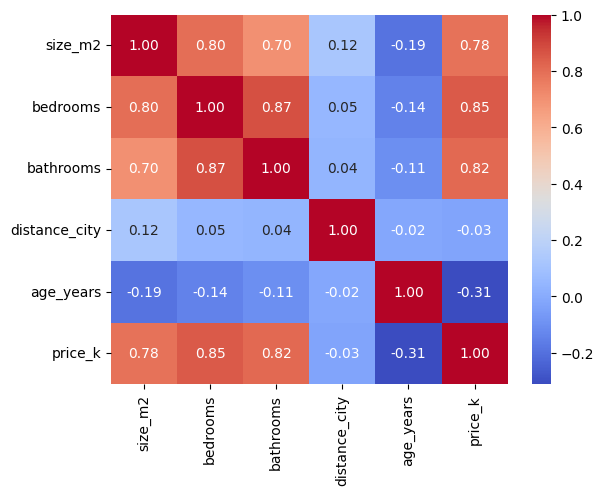

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df.corr()
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f')


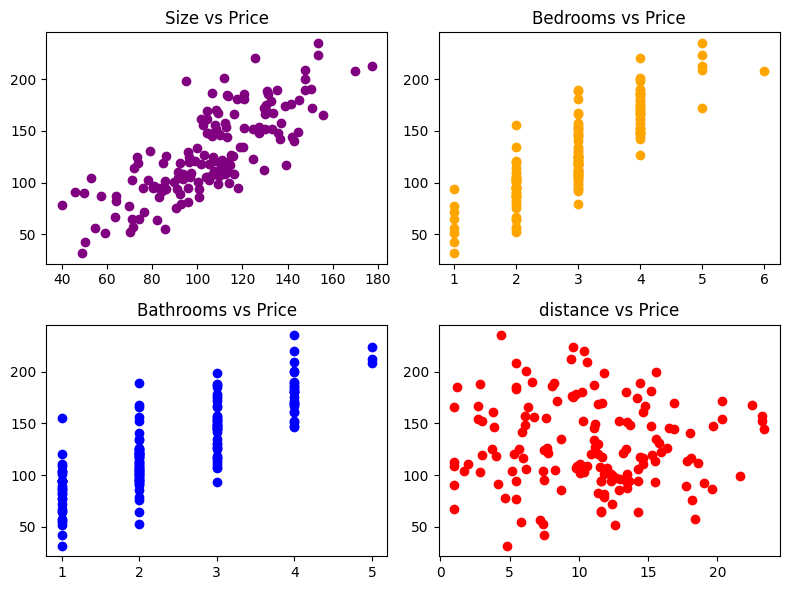

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0, 0].scatter(df['size_m2'], df['price_k'], color='purple')
axs[0, 0].set_title('Size vs Price')
axs[0, 1].scatter(df['bedrooms'], df['price_k'],color='orange')
axs[0, 1].set_title('Bedrooms vs Price')
axs[1, 0].scatter(df['bathrooms'], df['price_k'],color='blue')
axs[1, 0].set_title('Bathrooms vs Price')
axs[1, 1].scatter(df['distance_city'], df['price_k'],color='red')
axs[1, 1].set_title('distance vs Price')

plt.tight_layout()
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
x=df.drop(['price_k'],axis=1)
y=df['price_k']
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ols = LinearRegression().fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge R2 Score: 0.6525353613595786


In [40]:

ols = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=10).fit(X_train, y_train)


results = pd.DataFrame({"Feature": x.columns,"OLS_Coeff": ols.coef_,"Ridge_Coeff": ridge.coef_})


r2_scores = {
    "OLS Train R²": r2_score(y_train, ols.predict(X_train)),
    "OLS Test R²": r2_score(y_test, ols.predict(X_test)),
    "Ridge Train R²": r2_score(y_train, ridge.predict(X_train)),
    "Ridge Test R²": r2_score(y_test, ridge.predict(X_test)),
}

print("Coefficients:")
print(results)

Coefficients:
         Feature  OLS_Coeff  Ridge_Coeff
0        size_m2   0.416011     0.488419
1       bedrooms  10.909967    10.135324
2      bathrooms  16.914801    15.193324
3  distance_city  -0.661248    -0.668920
4      age_years  -0.731700    -0.723475
